#### Datta Fig. 9.5.5

Writer: Ryong-Gyu Lee  
2023.9.12

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# input variable
# conversion parameters for effective mass atomic unit
em = 0.25
voltage2eu = (1/27.211386) / em
ang2eu     = (1.88973) * em
amp2eu     = (1 /(6.623 * 1e-3)) / em
IE = 1/(2*np.pi)  # this conversion pararmeter is for the integral operator
Ef = 0.1 * voltage2eu
kT = 0.025 * voltage2eu
a = 3e-10 / 1e-10 * ang2eu
t0 = 1/(2*(a**2))

In [ ]:
def transmission(mode, a, t0, NS, NC, ND, VB=0.4):
    
    NP = NS + NC + ND
    
    # Hamiltonican matrix
    if mode == 1:
        UB= np.zeros(NP) # no barrier
    elif mode == 2: # tunneling barrier
        UB= np.zeros(NP)
        UB[NS:NS+NC] = VB
    elif mode == 3: # RT barrier
        UB= np.zeros(NP)
        UB[NS:NS+4] = VB
        UB[NS+NC-4:NS+NC] = VB
        
    UB = voltage2eu * UB

    T = 2 * t0 * np.diag(np.ones(NP)) - \
        t0 * np.diag(np.ones(NP-1), k = 1) - \
        t0 * np.diag(np.ones(NP-1), k = -1)
    T = T + np.diag(UB)

    # Bias
    V = 0
    mu1 = Ef + (V/2)
    mu2 = Ef - (V/2)
        
    U1 = np.zeros(NP)
    U1[:NS] = 0.5
    U1[NS:NS+NC] = np.linspace(0.5,-0.5,NC)
    U1[NS+NC:] = - 0.5
    U1 = V * U1

    # Energy grid for Green’s function method
    NE=501
    E= voltage2eu * np.linspace(-0.2,0.8,NE)
    zplus = voltage2eu * 1j* 1e-12
    dE = E[1]-E[0]
    f1= 1/(1+np.exp((E-mu1)/kT))
    f2= 1/(1+np.exp((E-mu2)/kT))
        
    # Transmission
    I=0 # Current
    TM = np.zeros((NE),dtype =complex)
    for k in range(NE):
        sig1=np.matrix(np.zeros((NP,NP),dtype =complex))
        sig2=np.matrix(np.zeros((NP,NP),dtype =complex))
        sig3=np.matrix(np.zeros((NP,NP),dtype =complex))
            
        ck1=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0))
        ka1=np.arccos(ck1);
        sig1[0,0]=-t0*np.exp(1j*ka1)
        gam1=1j*(sig1-sig1.H)
        ck2=1-((E[k]+zplus-U1[NP-1]-UB[NP-1])/(2*t0))
        ka2=np.arccos(ck2);
        sig2[NP-1,NP-1]=-t0*np.exp(1j*ka2)
        gam2=1j*(sig2-sig2.H);
        G=np.linalg.inv((E[k]+zplus)*np.eye(NP)-T-np.diag(U1)-sig1-sig2-sig3)
        TM[k]=np.real(np.trace(gam1*G*gam2*G.H))

        I=I+(dE*TM[k]*IE*(f1[k]-f2[k]))

    XX = a / ang2eu * 0.1 * np.arange(1,NP+1,1) # nm
    E = E / voltage2eu
    mu1 = mu1 / voltage2eu
    mu2 = mu2 / voltage2eu
    U  = (UB+U1) / voltage2eu
    XS = XX[:NS-4]
    XD = XX[NS+NC+4:NP]

    fig = plt.figure(figsize=[9.0,4.5])
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.plot(XX,U,c='b')
    ax1.plot(XS,mu1*np.ones(NS-4),c='r')
    ax1.plot(XD,mu2*np.ones(ND-4),c='r')
    ax1.set_xlabel('z (nm)')
    ax1.set_ylabel('Energy (eV)')
    ax2.plot(TM,E,c='b')
    ax2.set_xlabel('Transmission')
    ax2.set_ylabel('Energy (eV)')
 #   ax1.set_xlim(0,15)
    ax1.set_ylim(-0.2,0.8)
    ax2.set_xlim(0,1)
    ax2.set_ylim(-0.2, 0.8)
    fig.tight_layout()

D:\Program Files\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Program Files\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Program Files\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


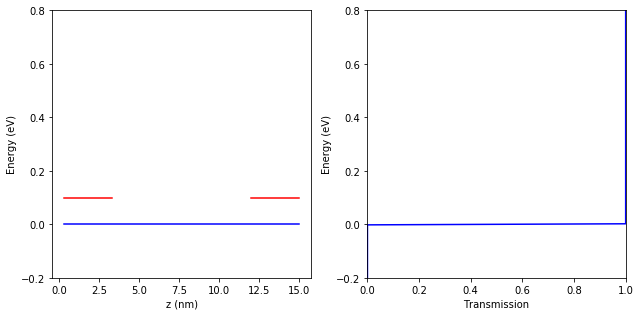

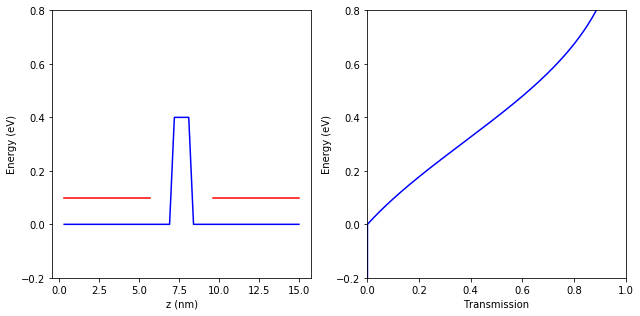

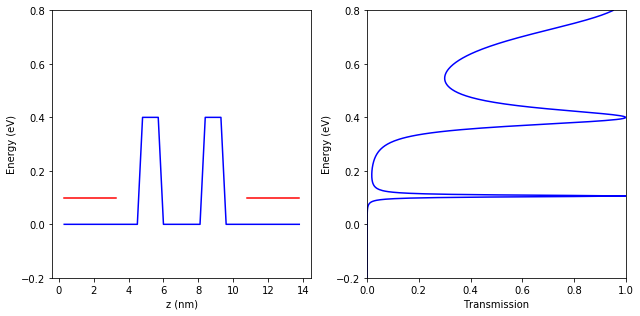

In [2]:
# Visualization

transmission(1,a,t0,NS=15,NC=20,ND=15) # Ballistic device
transmission(2,a,t0,NS=23,NC=4,ND=23) # Tunneling device
transmission(3,a,t0,NS=15,NC=16,ND=15) # Resonant tunneling device
